In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from numpy import *
import statsmodels.api as sm
import statsmodels.stats.diagnostic
import matplotlib.pyplot as plt

In [3]:
#import time
df2=pd.read_csv('../data/df_japan.csv',header=None,encoding='gbk',names=['time','none','catagory','title','content'])

#import sparse matrix
sp=sparse.load_npz('../output/sp.npz')
score=sp.todense()
df1=pd.DataFrame(score)



In [9]:
#先把时间做了freq=week，不是应该先合并再修改frequency嘛？问下学长好了
time_column = pd.to_datetime(df2['time'])
time_column = time_column.dt.to_period("W").dt.to_timestamp()

In [10]:
df3 = pd.concat([time_column, df1], axis=1)

In [11]:

df4 = df3.groupby(['time']).agg('mean')

In [28]:
new_col=[]
for i in range(15):
    colname=f"主题{i+1}"   
    i=i+1
    new_col.append(colname)
    

In [29]:
print(new_col)

['主题1', '主题2', '主题3', '主题4', '主题5', '主题6', '主题7', '主题8', '主题9', '主题10', '主题11', '主题12', '主题13', '主题14', '主题15']


In [14]:
df4.columns = new_col
df4.head(10)

,主题 1,主题 2,主题 3,主题 4,主题 5,主题 6,主题 7,主题 8,主题 9,主题 10,主题 11,主题 12,主题 13,主题 14,主题 15
time,,,,,,,,,,,,,,,
1946-05-13,0.239689,0.009174,0.002970,0.000000,0.043833,0.004258,0.000794,0.164113,0.005377,0.048281,0.027755,0.194897,0.034134,0.055485,0.169240
1946-05-20,0.228382,0.015569,0.012168,0.000000,0.024280,0.029396,0.000000,0.163510,0.006486,0.062599,0.006337,0.126708,0.081440,0.044294,0.198832
1946-05-27,0.171209,0.042785,0.014211,0.000000,0.076130,0.051086,0.002427,0.106381,0.000000,0.070517,0.020890,0.209018,0.043652,0.051314,0.140380
1946-06-03,0.175180,0.015112,0.006726,0.000000,0.035763,0.087265,0.006303,0.200664,0.000000,0.060361,0.000000,0.149945,0.073073,0.020882,0.168726
1946-06-10,0.099177,0.009308,0.012142,0.002320,0.048965,0.037368,0.000000,0.212470,0.012920,0.037467,0.018869,0.270477,0.020870,0.047446,0.170202
1946-06-17,0.114784,0.035368,0.020157,0.000662,0.045739,0.060256,0.000000,0.120394,0.000000,0.066639,0.010055,0.225741,0.035244,0.073004,0.191958
1946-06-24,0.144094,0.013303,0.013460,0.000000,0.072100,0.078259,0.001924,0.176718,0.008893,0.033429,0.016585,0.173075,0.038400,0.051427,0.178333
1946-07-01,0.089574,0.015055,0.000000,0.001412,0.039342,0.161015,0.003440,0.174710,0.006979,0.008808,0.028667,0.182043,0.067040,0.006607,0.215306
1946-07-08,0.088353,0.011439,0.008515,0.000000,0.068937,0.122533,0.004912,0.145016,0.016341,0.071653,0.042050,0.122291,0.010782,0.025513,0.261664


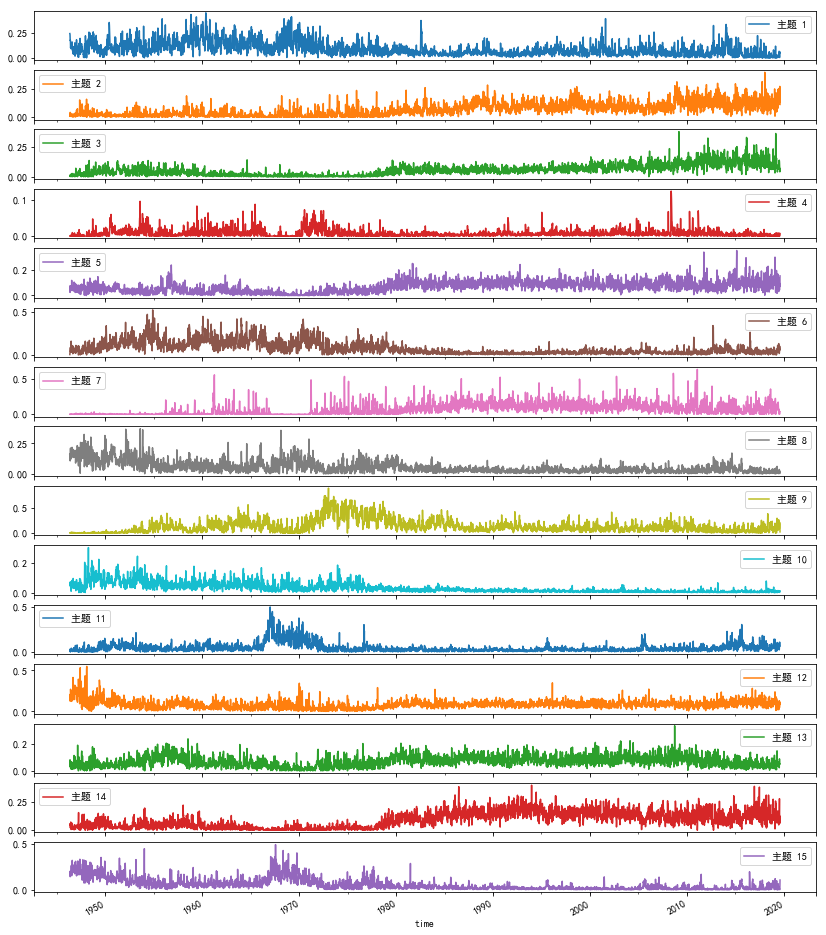

In [31]:
#如遇中文显示问题可加入以下代码
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
df4.plot(subplots=True, figsize=(14,18));

In [32]:
# model only after Volcker appointment
var_mod = sm.tsa.VAR(df4.iloc[:,0:5]).fit(maxlags=4, ic=None) # 滞后期只考虑 p <= 4

F:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [17]:
var_mod.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Jan, 2020
Time:                     20:16:19
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -35.9490
Nobs:                     3819.00    HQIC:                  -36.0598
Log likelihood:           41983.1    FPE:                2.05554e-16
AIC:                     -36.1208    Det(Omega_mle):     1.99995e-16
--------------------------------------------------------------------
Results for equation 主题 1
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.044056         0.003357           13.125           0.000
L1.主题 1         0.386414         0.016358           23.623           0.000
L1.主题 2         0.004772         0.021294            0.224           0.823
L1.主题 3   

In [33]:
np.abs(var_mod.roots)

array([2.29843085, 2.29184964, 2.29184964, 2.13978134, 2.13978134,
       2.13719901, 2.13719901, 1.93063016, 1.93063016, 1.83062955,
       1.83062955, 1.75018963, 1.75018963, 1.74667519, 1.66516652,
       1.35050885, 1.29452722, 1.25096206, 1.16036862, 1.02749528])

In [35]:
import re

In [37]:
for i in dir(var_mod.test_causality('主题 1', '主题 2', kind = 'Wald')):
    if re.match('_', i) is None:
        print(i)
# 查看有哪些子函数可以看。

caused
causing
conclusion
conclusion_str
crit_value
df
h0
method
pvalue
signif
signif_str
summary
test
test_statistic
title


In [21]:
variables = set(df4.iloc[:,0:5].columns.values)

In [22]:
for i in variables:
    for j in variables:
        if i != j:
            print(var_mod.test_causality(i, j, kind = 'Wald').summary())

Granger causality Wald-test. H_0: 主题 5 does not Granger-cause 主题 4. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    3.193          9.488       0.526  4 
----------------------------------------
Granger causality Wald-test. H_0: 主题 3 does not Granger-cause 主题 4. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.6267         9.488       0.960  4 
----------------------------------------
Granger causality Wald-test. H_0: 主题 2 does not Granger-cause 主题 4. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    2.015          9.488       0.733  4 
----------------------------------------
Granger causality Wald-test. H_0: 主题 1 does not Granger-cause 主题 4. Conclusion: fail to reject H_0 at 5% significance level.
Test sta

In [23]:
var_mod.model.select_order().summary()

,AIC,BIC,FPE,HQIC
0,-33.44,-33.43,2.999e-15,-33.44
1,-35.61,-35.56,3.436e-16,-35.59
2,-35.95,-35.86,2.444e-16,-35.92
3,-36.03,-35.90,2.244e-16,-35.99
4,-36.10,-35.92,2.104e-16,-36.04
5,-36.14,-35.93*,2.013e-16,-36.07
6,-36.17,-35.92,1.950e-16,-36.08
7,-36.20,-35.90,1.906e-16,-36.09*
8,-36.21,-35.87,1.881e-16,-36.09
9,-36.22,-35.85,1.854e-16,-36.09


In [24]:
 irf = var_mod.irf(24)



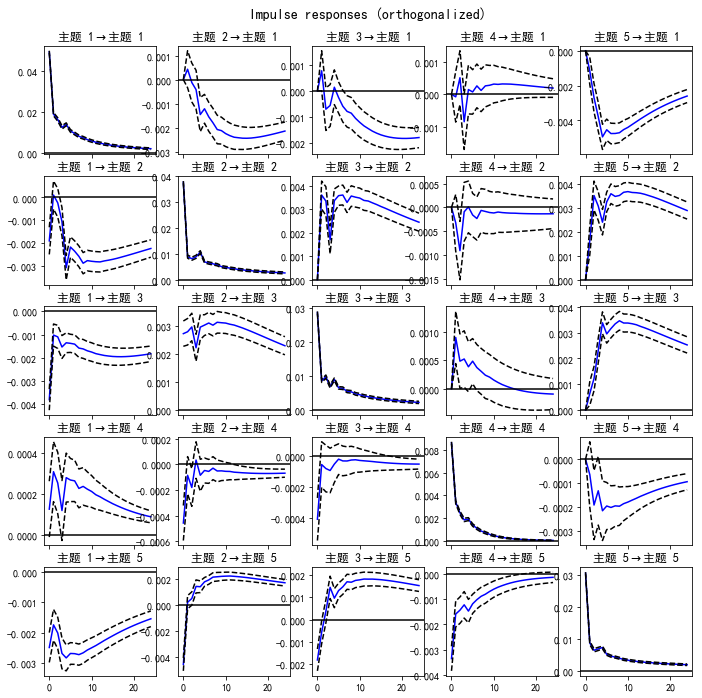

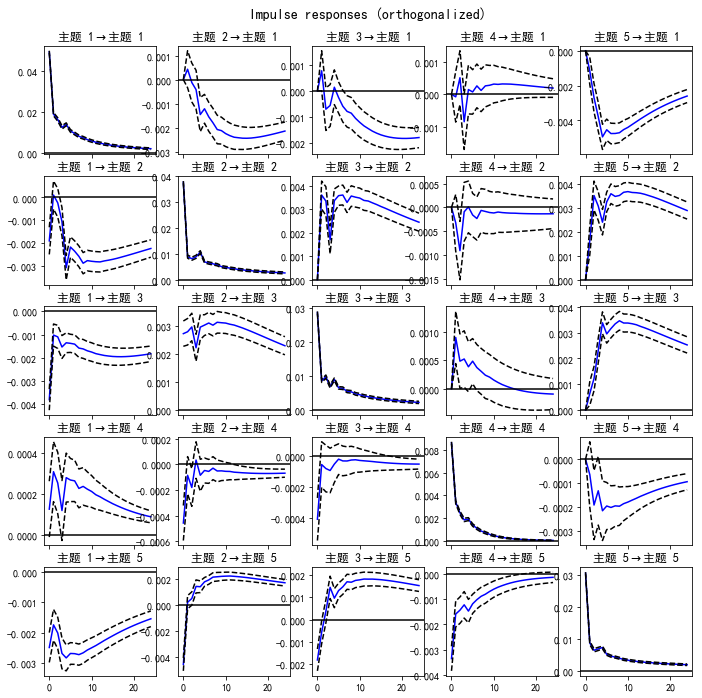

In [25]:
irf.plot(orth=True, signif=.33, subplot_params = {'frontsize' : 5})

In [26]:
var_mod.fevd(24).summary()

FEVD for 主题 1
          主题 1      主题 2      主题 3      主题 4      主题 5
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.999236  0.000066  0.000216  0.000002  0.000480
2     0.996698  0.000065  0.000356  0.000086  0.002795
3     0.992099  0.000115  0.000433  0.000300  0.007053
4     0.984978  0.000716  0.000411  0.000286  0.013608
5     0.979468  0.001095  0.000413  0.000277  0.018747
6     0.973335  0.001701  0.000492  0.000286  0.024186
7     0.967117  0.002502  0.000641  0.000283  0.029457
8     0.960881  0.003548  0.000814  0.000294  0.034463
9     0.955021  0.004616  0.001078  0.000308  0.038978
10    0.949311  0.005792  0.001422  0.000328  0.043148
11    0.943835  0.007040  0.001843  0.000346  0.046935
12    0.938598  0.008341  0.002326  0.000367  0.050368
13    0.933620  0.009646  0.002872  0.000387  0.053475
14    0.928874  0.010957  0.003469  0.000406  0.056294
15    0.924361  0.012256  0.004107  0.000424  0.058851
16    0.920075  0.013532  0.004777  0.000441  0.061

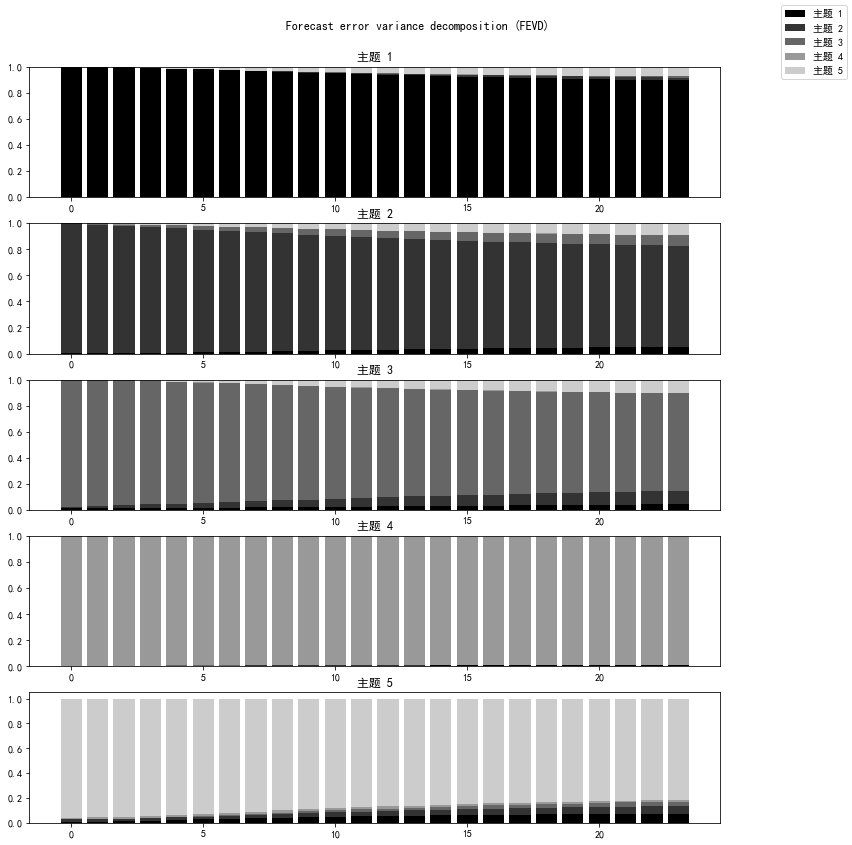

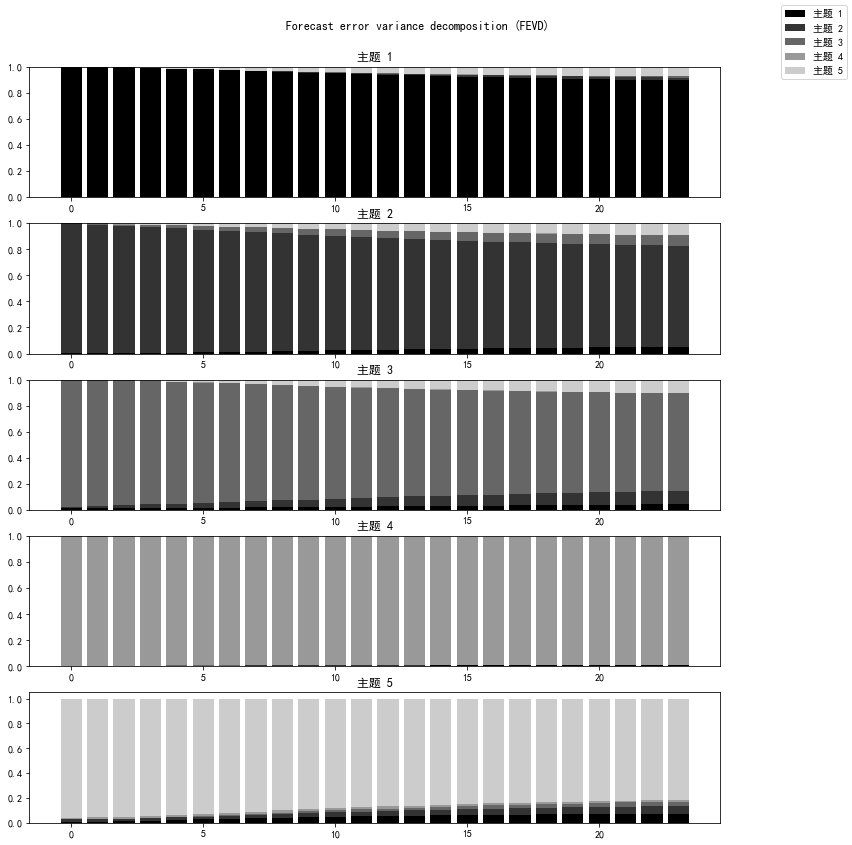

In [27]:
var_mod.fevd(24).plot(figsize=(12,12))

In [56]:
help(irf)

Help on IRAnalysis in module statsmodels.tsa.vector_ar.irf object:

class IRAnalysis(BaseIRAnalysis)
 |  IRAnalysis(model, P=None, periods=10, order=None, svar=False, vecm=False)
 |  
 |  Impulse response analysis class. Computes impulse responses, asymptotic
 |  standard errors, and produces relevant plots
 |  
 |  Parameters
 |  ----------
 |  model : VAR instance
 |  
 |  Notes
 |  -----
 |  Using Lütkepohl (2005) notation
 |  
 |  Method resolution order:
 |      IRAnalysis
 |      BaseIRAnalysis
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  G(self)
 |  
 |  H(self)
 |  
 |  __init__(self, model, P=None, periods=10, order=None, svar=False, vecm=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cov(self, orth=False)
 |      Compute asymptotic standard errors for impulse response coefficients
 |      
 |      Notes
 |      -----
 |      Lütkepohl eq 3.7.5
 |      
 |      Returns
 |      -------
 |  
 |  cum_effect_cov(self, orth